# Example

Example code for plotting any data generated from experiments.

Final train loss: 0.016674, conservative: 0.016198
Final test loss: 0.016493, conservative: 0.015947


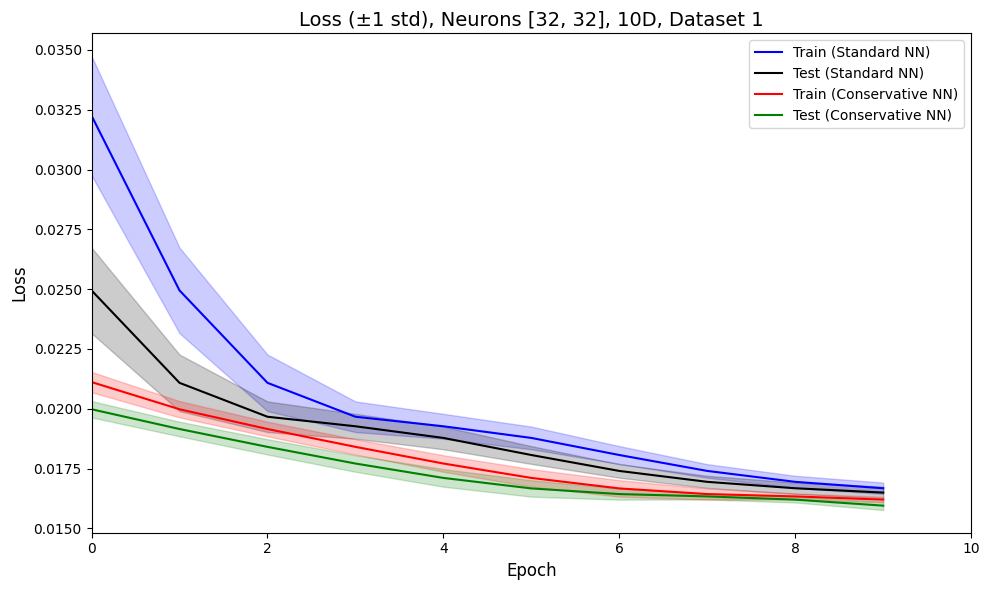

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

def read_losses(file_path):
    # Load the data from the file, skipping the header line
    data = np.loadtxt(file_path, skiprows=1)

    # Extract columns
    epochs = data[:, 0]
    mean_loss = data[:, 1]
    std_loss = data[:, 2]
    mean_test_loss = data[:, 3]
    std_test_loss = data[:, 4]
    mean_loss_grad = data[:, 5]
    std_loss_grad = data[:, 6]
    mean_test_loss_grad = data[:, 7]
    std_test_loss_grad = data[:, 8]

    return (epochs, mean_loss, std_loss, mean_test_loss, std_test_loss,
            mean_loss_grad, std_loss_grad, mean_test_loss_grad, std_test_loss_grad)
    
def plot_losses(epochs, mean_loss, std_loss, mean_test_loss, std_test_loss,
                mean_loss_grad, std_loss_grad, mean_test_loss_grad, std_test_loss_grad,
                dimension, dataset_number, neurons):

    print(f"Final train loss: {mean_loss[-1]}, conservative: {mean_loss_grad[-1]}")
    print(f"Final test loss: {mean_test_loss[-1]}, conservative: {mean_test_loss_grad[-1]}")

    plt.figure(figsize=(10, 6))

    # Standard NN: Training + Test
    plt.plot(epochs, mean_loss, label="Train (Standard NN)", color="blue")
    plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color="blue", alpha=0.2)
    plt.plot(epochs, mean_test_loss, label="Test (Standard NN)", color="black")
    plt.fill_between(epochs, mean_test_loss - std_test_loss, mean_test_loss + std_test_loss, color="black", alpha=0.2)

    # Conservative NN: Training + Test
    plt.plot(epochs, mean_loss_grad, label="Train (Conservative NN)", color="red")
    plt.fill_between(epochs, mean_loss_grad - std_loss_grad, mean_loss_grad + std_loss_grad, color="red", alpha=0.2)
    plt.plot(epochs, mean_test_loss_grad, label="Test (Conservative NN)", color="green")
    plt.fill_between(epochs, mean_test_loss_grad - std_test_loss_grad, mean_test_loss_grad + std_test_loss_grad, color="green", alpha=0.2)

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title(f"Loss (±1 std), Neurons {neurons}, {dimension}D, Dataset {dataset_number}", fontsize=14)
    plt.xlim([0, epochs[-1] + 1])
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

## Example on how to retrieve data for a specific graph and re-plot
# User inputs
dimension = 10
dataset_number = 1
neurons = [32, 32]

# Construct the filename
filename = f"{dimension}D_losses_{dataset_number}.txt"
file_path = os.path.join("consolidated_text_files", filename)

if not os.path.exists(file_path):
    print(f"File {filename} does not exist in the consolidated_text_files folder.")
else:
    results = read_losses(file_path)
    plot_losses(*results, dimension, dataset_number, neurons)